In [38]:
#Loading the dataset
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

Saving loan_data.csv to loan_data (1).csv


In [ ]:
data = pd.read_csv(list(uploaded.keys())[0])

In [ ]:
data.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [ ]:
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

#Understanding the data using paandas profiling
profile = ProfileReport(data, title="Pandas Profiling Report")
profile.to_file("your_report.html") # Save the report to an HTML file

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 93.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=954da327b16baf3ccfb3cff293b048c98ec0054978389c9b0764939097429089
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()  # Display the report within the notebook

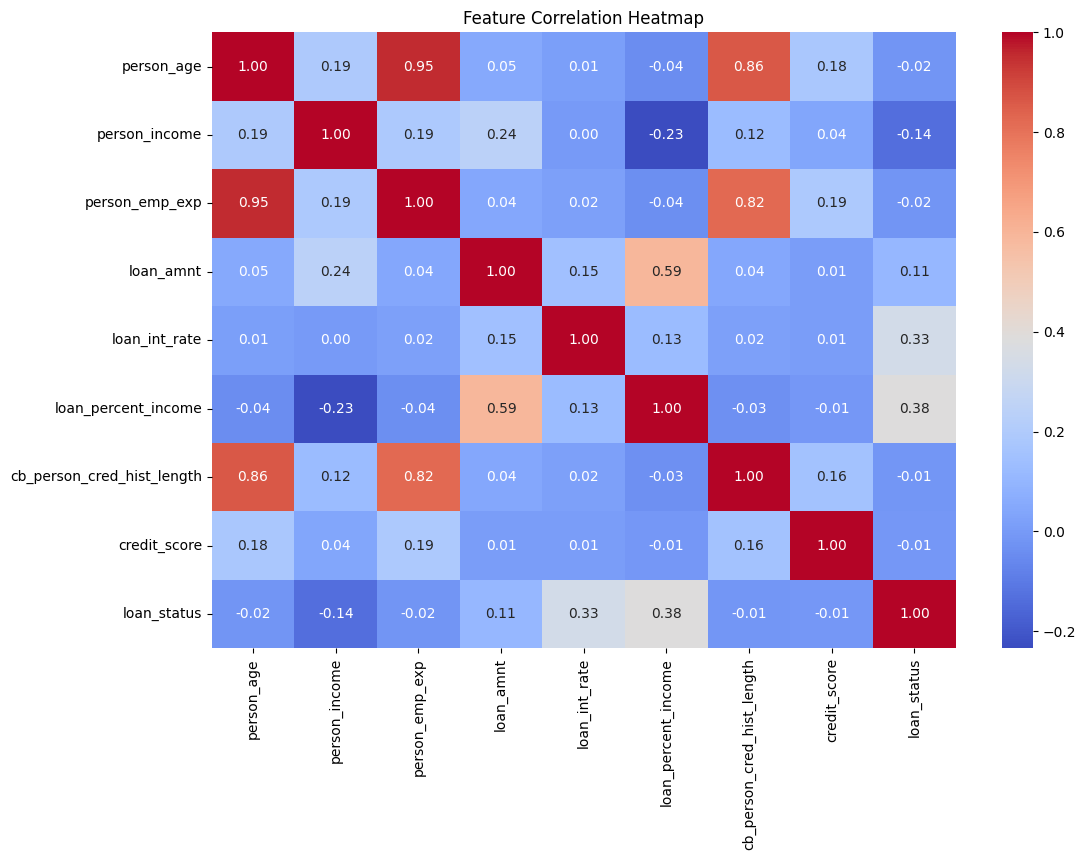

In [ ]:
#checking correlation between highly correlated variables using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Make sure pandas is imported

# Compute correlation matrix, only including numeric columns
corr_matrix = data.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Feature Correlation Heatmap")
plt.show()

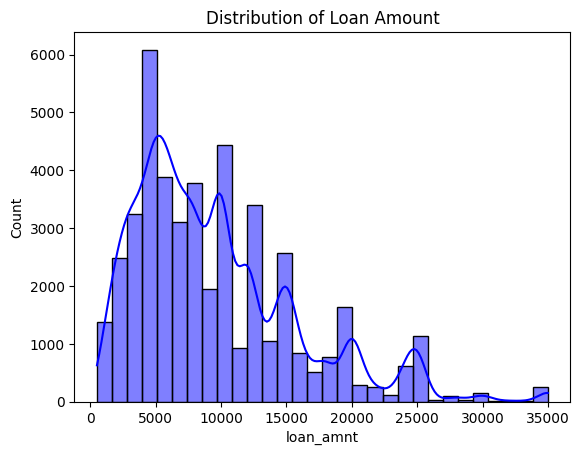

In [ ]:
#Performing Univariate Analysis
sns.histplot(data['loan_amnt'], kde=True, color='blue', bins=30)
plt.title("Distribution of Loan Amount")
plt.show()

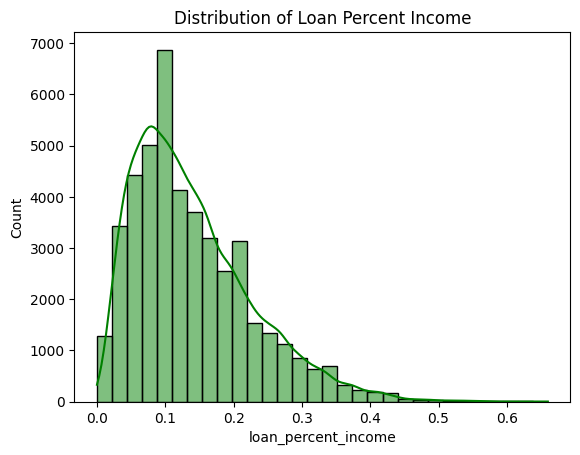

In [ ]:
sns.histplot(data['loan_percent_income'], kde=True, color='green', bins=30)
plt.title("Distribution of Loan Percent Income")
plt.show()

<ipython-input-9-89d84fba7a19>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='loan_status', palette='Set1')


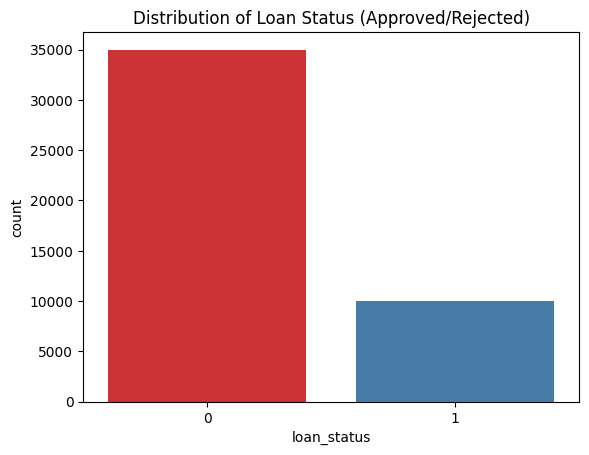

In [ ]:
sns.countplot(data=data, x='loan_status', palette='Set1')
plt.title("Distribution of Loan Status (Approved/Rejected)")
plt.show()

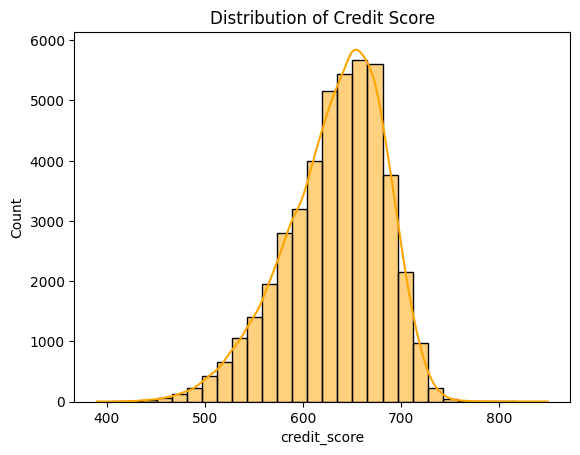

In [ ]:
sns.histplot(data['credit_score'], kde=True, color='orange', bins=30)
plt.title("Distribution of Credit Score")
plt.show()

<ipython-input-11-0f5e9d4f622c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='previous_loan_defaults_on_file', palette='coolwarm')


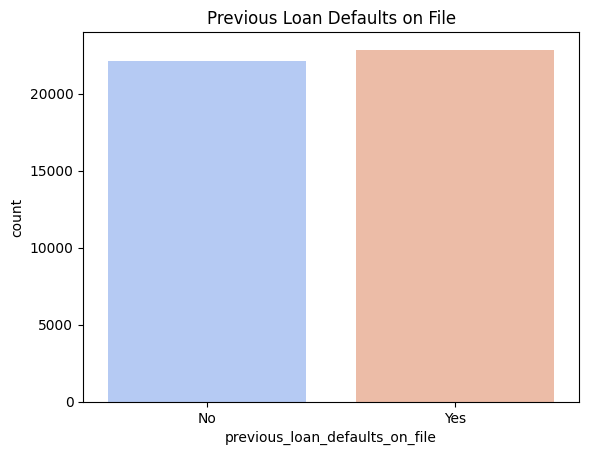

In [ ]:
sns.countplot(data=data, x='previous_loan_defaults_on_file', palette='coolwarm')
plt.title("Previous Loan Defaults on File")
plt.show()

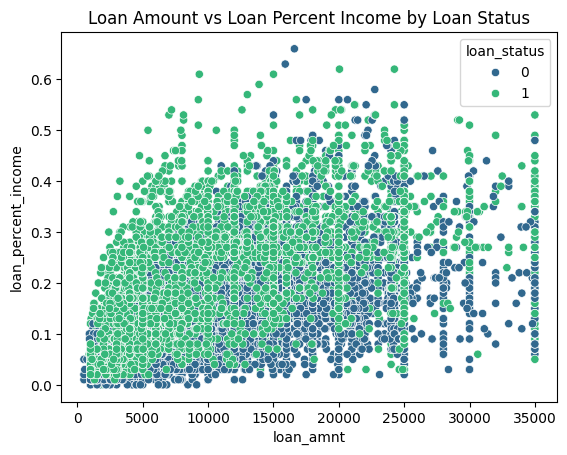

In [ ]:
#Performing Bivariate Analysis
sns.scatterplot(data=data, x='loan_amnt', y='loan_percent_income', hue='loan_status', palette='viridis')
plt.title("Loan Amount vs Loan Percent Income by Loan Status")
plt.show()

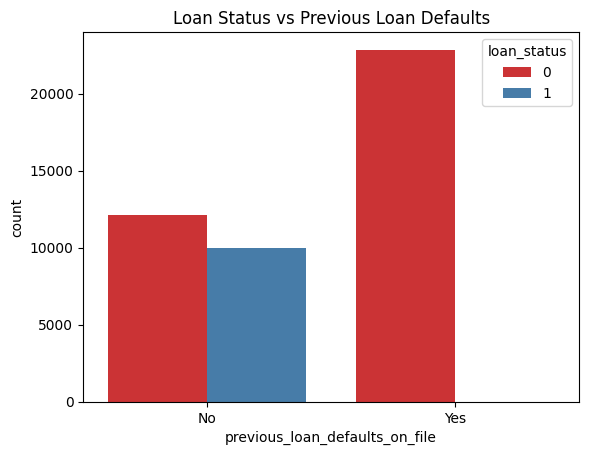

In [ ]:
sns.countplot(data=data, x='previous_loan_defaults_on_file', hue='loan_status', palette='Set1')
plt.title("Loan Status vs Previous Loan Defaults")
plt.show()

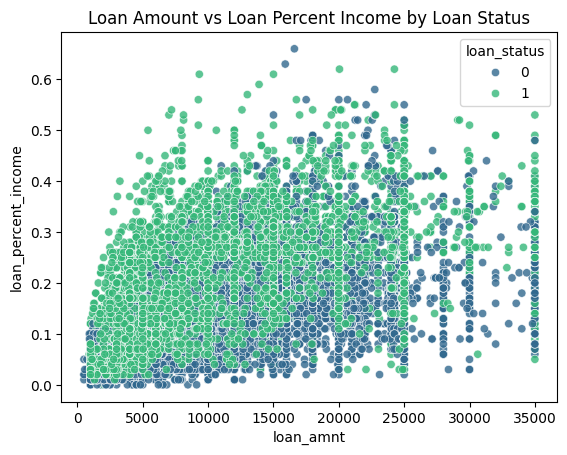

In [ ]:
# Scatter plot for loan amount and percent income
sns.scatterplot(data=data, x="loan_amnt", y="loan_percent_income", hue="loan_status", palette="viridis", alpha=0.8)
plt.title("Loan Amount vs Loan Percent Income by Loan Status")
plt.show()

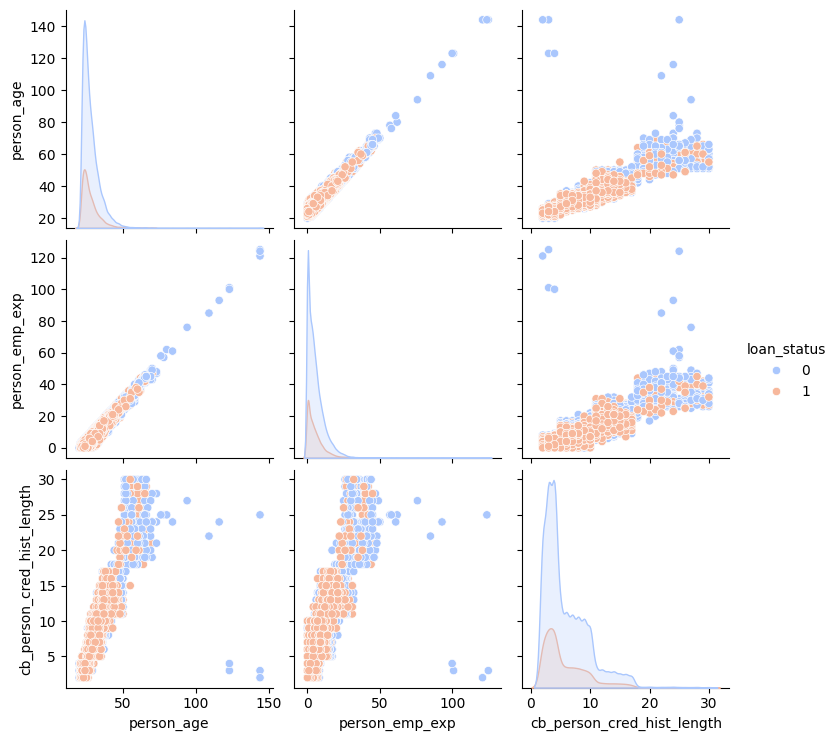

In [ ]:
#Performing Multivariate Analysis
# Pair plot for age, employment experience, and credit history length
sns.pairplot(data, vars=["person_age", "person_emp_exp", "cb_person_cred_hist_length"], hue="loan_status", palette="coolwarm")
plt.show()

<ipython-input-17-0895908c5133>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='Set2')
<ipython-input-17-0895908c5133>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='Set2')
<ipython-input-17-0895908c5133>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[column], palette='Set2')
<ipython-input-17-0895908c5133>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

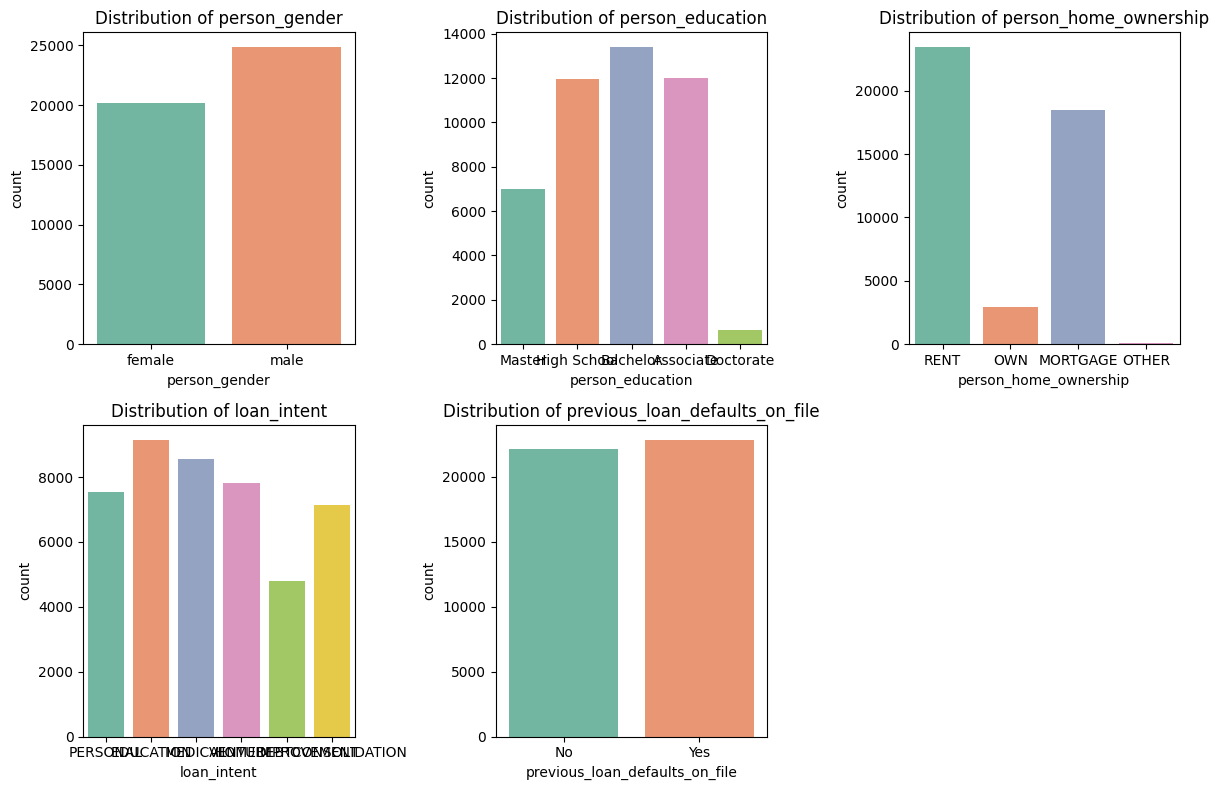

In [ ]:
# Bar plot for categorical variables
categorical_columns = ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

plt.figure(figsize=(12, 8))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=data[column], palette='Set2')
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

In [ ]:
#Converting 'previous_loan_defaults_on_file' to 0 and 1
data['previous_loan_defaults_on_file'] = data['previous_loan_defaults_on_file'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
data.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

   previous_loan_defaults_on_file  loan_status  
0                               0            1  
1                               1            0  
2                               0            1  
3                               0            1  
4                               0            1

In [ ]:
#Applying one-hot encoding to selected categorical columns
data = pd.get_dummies(data, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply label encoding to binary categorical columns
data['person_gender'] = le.fit_transform(data['person_gender'])
data['person_education'] = le.fit_transform(data['person_education'])  # Only if it's ordinal

In [ ]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
numerical_cols = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X = data.drop('loan_status', axis=1)  # Features (independent variables)
y = data['loan_status']  # Target variable (loan approval status)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8935555555555555
Confusion Matrix:
 [[6554  436]
 [ 522 1488]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.77      0.74      0.76      2010

    accuracy                           0.89      9000
   macro avg       0.85      0.84      0.84      9000
weighted avg       0.89      0.89      0.89      9000



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train RandomForest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.9295555555555556
Confusion Matrix:
 [[6800  190]
 [ 444 1566]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      6990
           1       0.89      0.78      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.92      0.88      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9004444444444445
Confusion Matrix:
 [[6527  463]
 [ 433 1577]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94      6990
           1       0.77      0.78      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



In [ ]:
import xgboost as xgb

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9365555555555556
Confusion Matrix:
 [[6794  196]
 [ 375 1635]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.89      0.81      0.85      2010

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.91      9000
weighted avg       0.94      0.94      0.94      9000



In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Perform cross-validation for each model
for model_name, model in models.items():
    # Using cross_val_score to get scores across 5 folds
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} - Cross-Validation Accuracy: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

Logistic Regression - Cross-Validation Accuracy: 0.8954 ± 0.0070
Random Forest - Cross-Validation Accuracy: 0.9255 ± 0.0060
Decision Tree - Cross-Validation Accuracy: 0.8960 ± 0.0060
XGBoost - Cross-Validation Accuracy: 0.9281 ± 0.0064


In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy: {lr_cv_scores.mean()}")

# Random Forest
rf_model = RandomForestClassifier()
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
print(f"Random Forest Cross-Validation Accuracy: {rf_cv_scores.mean()}")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print(f"Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean()}")

# XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
print(f"XGBoost Cross-Validation Accuracy: {xgb_cv_scores.mean()}")

Logistic Regression Cross-Validation Accuracy: 0.8953777777777777
Random Forest Cross-Validation Accuracy: 0.9251777777777777
Decision Tree Cross-Validation Accuracy: 0.8959555555555555
XGBoost Cross-Validation Accuracy: 0.9280888888888889


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg_model = LogisticRegression()  # Initialize the model
log_reg_model.fit(X_train, y_train)  # Train the model

log_reg_pred = log_reg_model.predict(X_test)  # Predict with the model
log_reg_acc = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

# Cross-validation score for Logistic Regression
log_reg_cv = cross_val_score(log_reg_model, X, y, cv=5).mean()

# Random Forest
rf_model.fit(X_train, y_train)  # Ensure the model is trained before prediction
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Cross-validation score for Random Forest
rf_cv = cross_val_score(rf_model, X, y, cv=5).mean()

# Decision Tree
dt_model.fit(X_train, y_train)  # Ensure the model is trained before prediction
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)

# Cross-validation score for Decision Tree
dt_cv = cross_val_score(dt_model, X, y, cv=5).mean()

# XGBoost
xgb_model.fit(X_train, y_train)  # Ensure the model is trained before prediction
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

# Cross-validation score for XGBoost
xgb_cv = cross_val_score(xgb_model, X, y, cv=5).mean()

# Prepare the results for comparison
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Accuracy': [log_reg_acc, rf_acc, dt_acc, xgb_acc],
    'Precision': [log_reg_precision, rf_precision, dt_precision, xgb_precision],
    'Recall': [log_reg_recall, rf_recall, dt_recall, xgb_recall],
    'F1-Score': [log_reg_f1, rf_f1, dt_f1, xgb_f1],
    'Cross-Validation Score': [log_reg_cv, rf_cv, dt_cv, xgb_cv],
}

# Convert to a DataFrame for better readability
import pandas as pd
results_df = pd.DataFrame(results)

# Display the comparison table
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score  \
0  Logistic Regression  0.893556   0.773389  0.740299  0.756482   
1        Random Forest  0.928556   0.891242  0.774627  0.828853   
2        Decision Tree  0.900444   0.773039  0.784577  0.778765   
3              XGBoost  0.936556   0.892955  0.813433  0.851341   

   Cross-Validation Score  
0                0.895378  
1                0.925667  
2                0.895956  
3                0.928089  


<ipython-input-37-2daa15bb7ff1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-37-2daa15bb7ff1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-37-2daa15bb7ff1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
<ipython-input-37-2daa15bb7ff1>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

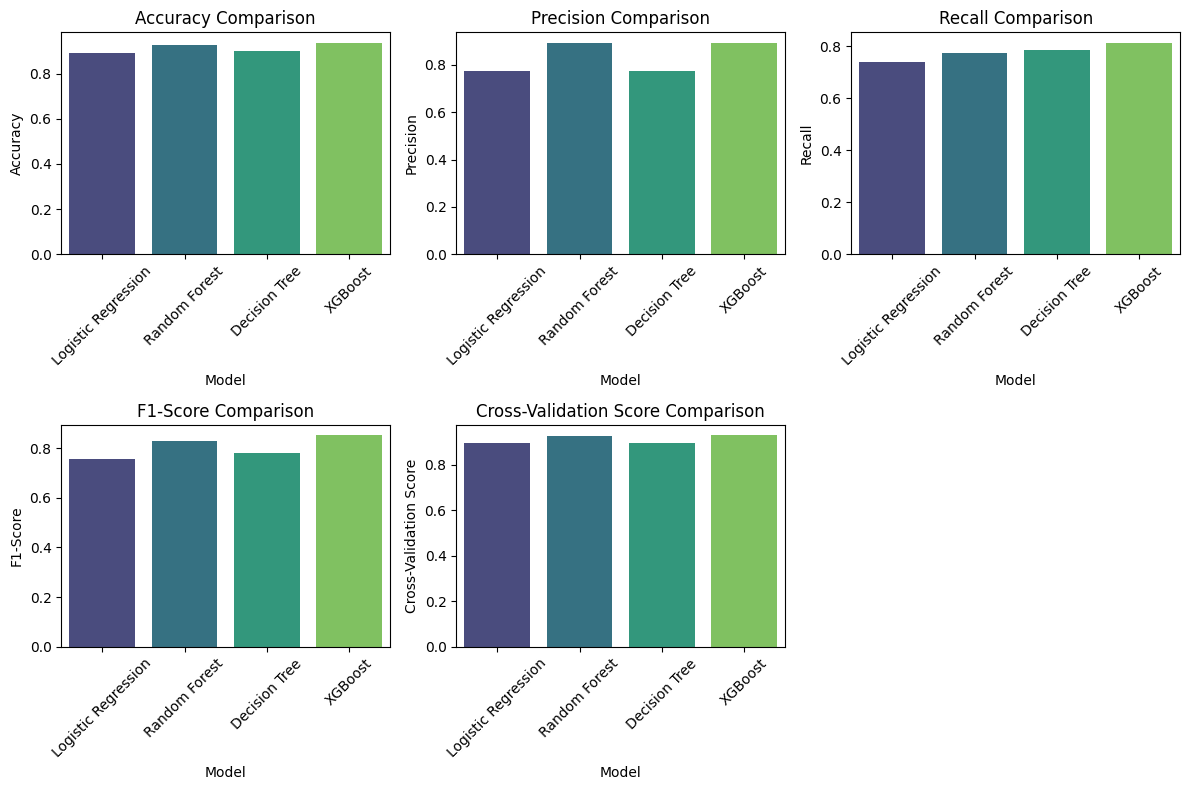

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the results for comparison
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost'],
    'Accuracy': [log_reg_acc, rf_acc, dt_acc, xgb_acc],
    'Precision': [log_reg_precision, rf_precision, dt_precision, xgb_precision],
    'Recall': [log_reg_recall, rf_recall, dt_recall, xgb_recall],
    'F1-Score': [log_reg_f1, rf_f1, dt_f1, xgb_f1],
    'Cross-Validation Score': [log_reg_cv, rf_cv, dt_cv, xgb_cv],
}

# Convert to a DataFrame for better readability
results_df = pd.DataFrame(results)

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot each metric as a separate bar plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cross-Validation Score']

# Create a bar plot for each metric
for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)  # Create a 2x3 grid of subplots
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()